Digit recognition system is the working of a machine to train itself or recognizing the digits from different sources like emails, bank cheque, papers, images, etc. and in different real-world scenarios for online handwriting recognition on computer tablets or system, recognize number plates of vehicles, processing bank cheque amounts, numeric entries in forms filled up by hand (say-tax forms) and so on. The handwritten digits are not always of same size, width, orientation and justified to margins as they differ from writing of person to person, so the general problem would be while classifying the digits due to the similarity between digits such as 1 and 7,5 and 6,3 and 8,2 and 5,2 and 7,etc. This problem is faced more when many people write a single digit with a variety of different handwritings. Lastly, the uniqueness and variety in the handwriting of different individuals also influence the formation and appearance of the digits.

This dataset includes handwriting digits total of 60,000 images consisting of 49,000 examples in training set with labelled images from 10 digits (0 to 9) and 21,000 examples in testing set which are unlabelled images.

Handwritten digits are images in the form of 28*28 gray scale intensities of images representing an image. The size of an image is 28 by 28, so there are 784 (28*28) values for the label. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 to 255 , inclusive. Our goal is to correctly identify digits from a dataset of tons of thousands of handwritten images.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [3]:
#loading the dataset
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


5


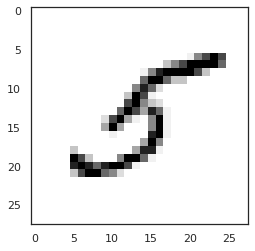

In [4]:
#viewing the image of the digit at index 35
%matplotlib inline
import matplotlib.pyplot as plt 
image_index=35
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')
plt.show()

In [5]:
#checking the shape of the training data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#checking the type of the data
type(x_train)
x_train.dtype

dtype('uint8')

The data type is unsigned 8-bit integer.

In [7]:
#checking for null values in training data
np.isnan(x_train).any()

False

In [8]:
#checking for null values in test data
np.isnan(x_test).any()


False

In [9]:
#checking for null values in training labels data
np.isnan(y_train).any()

False

In [10]:
#checking for null values in test labels data
np.isnan(y_test).any()

False

Hence,there are no missing values in the whole dataset

In [11]:
#reshaping 3-D array to 2-D array
x_train1=x_train.reshape(60000,784)
x_train1.shape

(60000, 784)

In [12]:
#converting the numpy array into pandas Datframe for further analysis
df=pd.DataFrame.from_records(x_train1)
df.shape

(60000, 784)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


**Conclusions from the description**
1. Each figure is a 28x28 sized image,so there are 784 columns,each depicting the intensity value of a pixel.
2. Many pixels have 0 intensity value.
3. Some pixels have values other than 0 as in the last few columns,the mean,std and max are not 0.
4. Most of the pixels in each column have 0 value as 25%,75% and the median for all the columns are 0.


In [15]:
#checking the index of a pixel with intensity 254 
df[df.iloc[:,774]==254].index

Int64Index([4928], dtype='int64')

In [16]:
#checking the shape of the training labels data 
y_train.shape

(60000,)

In [17]:
#converting the training labels data into a dataframe
df_y=pd.DataFrame.from_records(y_train.reshape(60000,1))
df_y[0].head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

In [18]:
#displaying the count of each value (0,1,2,3,4,5,6,7,8,9) in the labels
df_y[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

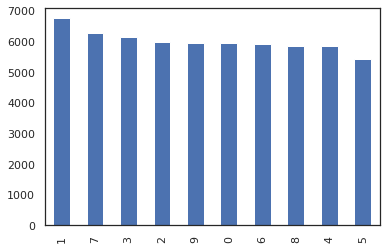

In [19]:
#plotting a bar plot to show the frequency of each digit in the training data
df_y[0].value_counts().plot(kind='bar')
plt.show()

All the digits occur with almost the same frequency in the dataset.

In [20]:
x_test1=x_test.reshape(10000,784)
df_2=pd.DataFrame.from_records(x_test1)
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Preprocessing 
#Reshaping the images to a single color channel
x_train = df.values.reshape((-1, 28, 28, 1))
x_test = df_2.values.reshape((-1, 28, 28, 1))

In [22]:
#Checking the shape after re-shaping
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [23]:
#One-hot encoding on target
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape
y_test = to_categorical(y_test, num_classes = 10)
y_test.shape

(10000, 10)

In [24]:
#preparing pixel data
#converting integers into float
train_norm_x = x_train.astype('float32')
test_norm_x = x_test.astype('float32')

In [25]:
#normalizing by dividing by the highest value i.e. 255
train_norm_x=train_norm_x/255.0
test_norm_x=test_norm_x/255.0

In [26]:
#splitting into training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(train_norm_x, y_train, test_size = 0.1, random_state=2)

In [27]:
#making a cnn model
## my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [28]:
epochs = 30
batch_size = 86

In [29]:
#compiling the model using adam optimizer
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [30]:
#Data Augmentation 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
#datagen.fit(X_train)

In [31]:
# Annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 21s - loss: 0.3478 - accuracy: 0.8877 - val_loss: 0.0613 - val_accuracy: 0.9807
Epoch 2/30
 - 17s - loss: 0.1187 - accuracy: 0.9646 - val_loss: 0.0407 - val_accuracy: 0.9872
Epoch 3/30
 - 16s - loss: 0.0883 - accuracy: 0.9735 - val_loss: 0.0315 - val_accuracy: 0.9895
Epoch 4/30
 - 16s - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 5/30
 - 17s - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 6/30
 - 16s - loss: 0.0608 - accuracy: 0.9820 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 7/30
 - 16s - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.0272 - val_accuracy: 0.9923
Epoch 8/30
 - 16s - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0311 - val_accuracy: 0.9925
Epoch 9/30
 - 18s - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0201 - val_accuracy: 0.9940
Epoch 10/30
 - 16s - loss: 0.0481 - accuracy: 0.9860 - val_loss: 0.0260 - val_accuracy: 0.9923
Epoch 11/30
 - 17s - loss: 0.0425 - accuracy: 0.9873 - val_

In [33]:
score=model.evaluate(x_test,y_test)
print(score)

10000/10000 [==============================] - 1s 92us/step
[2.5161948922167734, 0.9954000115394592]


This model gives us a high accuracy of 99.57%

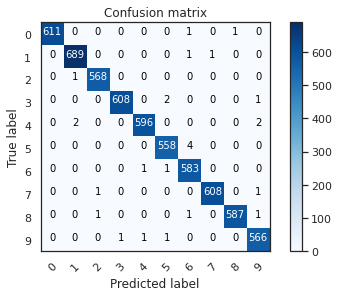

In [35]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))


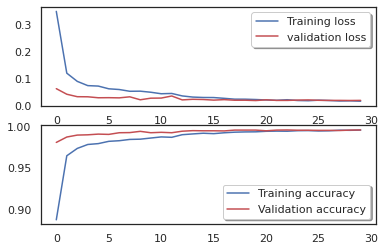

In [36]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [38]:
# imports

from keras.models import model_from_json 

# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded Model from disk
